Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 239ms/step - accuracy: 0.2903 - loss: 1.8984 - val_accuracy: 0.4951 - val_loss: 1.4030
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 234ms/step - accuracy: 0.4857 - loss: 1.4098 - val_accuracy: 0.5423 - val_loss: 1.3126
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 233ms/step - accuracy: 0.5513 - loss: 1.2464 - val_accuracy: 0.6349 - val_loss: 1.0337
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 235ms/step - accuracy: 0.5880 - loss: 1.1476 - val_accuracy: 0.6332 - val_loss: 1.0446
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 235ms/step - accuracy: 0.6132 - loss: 1.0880 - val_accuracy: 0.6782 - val_loss: 0.9035
313/313 - 8s - 26ms/step - accuracy: 0.6782 - loss: 0.9035
Test accuracy: 0.6782000064849854


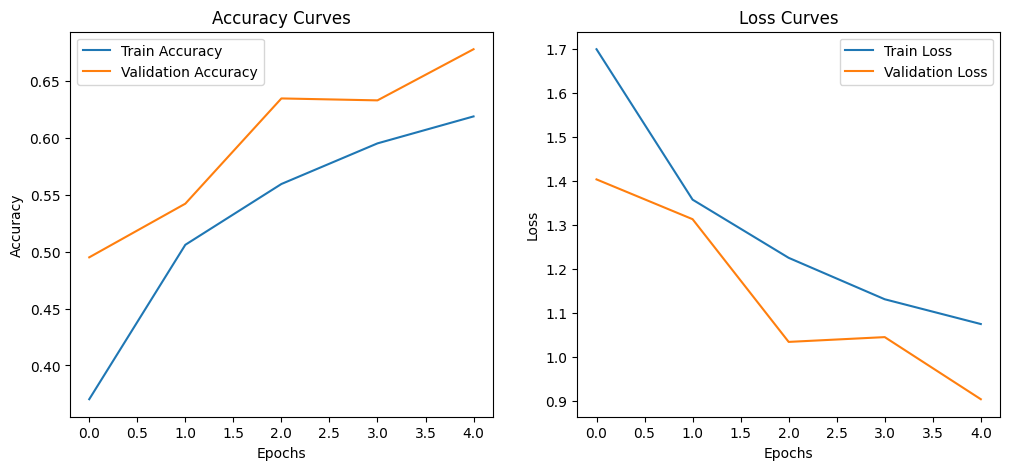

In [2]:
# Install necessary packages if not already installed
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 1. Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Define the ConvNet architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(train_images)

# 5. Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=5,
                    validation_data=(test_images, test_labels))

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# 7. Plot the accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
